### Models for:
- Raft Goose Salmon Falls bruneau
- Snake Above Palisades
- Umatilla Walla Walla Willow
- Upper Clark Fork River Basin
- Weiser Payette Boise
- White Green Cedar Skykomish Snoqualmi Baker Skagit
- Willamette
- Yakima Ahtanum

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV, train_test_split
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [3]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [28]:
#a function to read in my csvs, set their index as a datetime object, and remove columns I already know I do not want
def data_formatter(filename):
    df = pd.read_csv(f'./basin_csvs/{filename}')
    df.set_index(pd.to_datetime(df['yyyymmdd']), inplace = True)
    df.drop(columns = ['Unnamed: 0', 'yyyymmdd', 'lat','long','station_id','elevation'],inplace = True)
    #remove dummy columns that we don't need after all
    df.drop(columns = df.columns[6:], inplace = True)
    return df

In [17]:
#groups all the different observations by different stations in each basin by date, and averages them
def basin_grouper(basin_df):
    df = pd.DataFrame(basin_df.groupby('yyyymmdd').mean())
    return df.asfreq(pd.DateOffset(years=1))

In [47]:
grants_basins = ['Raft Goose Salmon Falls Bruneau', 'Snake Above Palisades',
                 'Umatilla Walla Walla Willow', 'Upper Clark Fork River Basin',
                 'Weiser Payette Boise', 'White Green Cedar Skykomish Snoqualmi Baker Skagit',
                 'Willamette', 'Yakima Ahtanum']

In [30]:
raft_goose_salmon_falls_bruneau_df = data_formatter('raft_goose_salmon_falls_bruneau.csv')
snake_above_palisades_df = data_formatter('snake_above_palisades.csv')
umatilla_walla_walla_willow_df = data_formatter('umatilla_walla_walla_willow.csv')
upper_clark_fork_river_basin_df = data_formatter('upper_clark_fork_river_basin.csv')
weiser_payette_boise_df = data_formatter('weiser_payette_boise.csv')
white_green_cedar_skykomish_snoqualmi_baker_skagit_df = data_formatter('white_green_cedar_skykomish_snoqualmi_baker_skagit.csv')
willamette_df = data_formatter('willamette.csv')
yakima_ahtanum_df = data_formatter('yakima_ahtanum.csv')

In [31]:
raft_goose_salmon_falls_bruneau_df.sort_index(inplace = True)

In [32]:
raft_goose_salmon_falls_bruneau_df.head()

,acton_id,station_name,wteq_amt,wteq_med,wteq_amt_pct_med,prec_wytd_amt
yyyymmdd,,,,,,
1990-02-10,15G02S,Wilson Creek,14.65,9.9,103.0,19.4
1990-02-10,15H14S,Pole Creek R.S.,13.10,13.2,99.0,6.6
1990-02-10,15H03S,Seventysix Creek,7.10,8.0,89.0,8.8
1990-02-10,14G02S,Magic Mountain,10.30,13.5,76.0,10.9
1990-02-10,13G01S,Howell Canyon,9.50,15.4,62.0,11.9


In [33]:
raft_group_df = basin_grouper(raft_goose_salmon_falls_bruneau_df)
snake_group_df = basin_grouper(snake_above_palisades_df)
umatilla_group_df = basin_grouper(umatilla_walla_walla_willow_df)
upper_clark_group_df = basin_grouper(upper_clark_fork_river_basin_df)
weiser_group_df = basin_grouper(weiser_payette_boise_df)
white_green_group_df = basin_grouper(white_green_cedar_skykomish_snoqualmi_baker_skagit_df)
wilamette_group_df = basin_grouper(willamette_df)
yakima_group_df  = basin_grouper(yakima_ahtanum_df)

# list of grouped dataframes
grouped_list = [
    raft_group_df,
    snake_group_df,
    umatilla_group_df,
    upper_clark_group_df,
    weiser_group_df,
    white_green_group_df,
    wilamette_group_df,
    yakima_group_df
]

## adfuller tests

In [48]:
for basin, name in zip(grouped_list, grants_basins):
    print(name)
    print(interpret_dftest(adfuller(basin['wteq_amt'])))
    print()

Raft Goose Salmon Falls Bruneau
Test Statistic   -6.411153e+00
p-value           1.889420e-08
dtype: float64

Snake Above Palisades
Test Statistic   -4.760098
p-value           0.000065
dtype: float64

Umatilla Walla Walla Willow
Test Statistic   -7.989799e+00
p-value           2.492127e-12
dtype: float64

Upper Clark Fork River Basin
Test Statistic   -3.302768
p-value           0.014755
dtype: float64

Weiser Payette Boise
Test Statistic   -5.515112
p-value           0.000002
dtype: float64

White Green Cedar Skykomish Snoqualmi Baker Skagit
Test Statistic   -4.057200
p-value           0.001139
dtype: float64

Willamette
Test Statistic   -6.611915e+00
p-value           6.345649e-09
dtype: float64

Yakima Ahtanum
Test Statistic   -0.847460
p-value           0.804782
dtype: float64



In [35]:
for df in grouped_list:
    df.drop(columns = ['wteq_amt_pct_med', 'wteq_med'], inplace = True)

In [36]:
raft_group_df.head()

,wteq_amt,prec_wytd_amt
yyyymmdd,,
1990-02-10,10.00625,10.5125
1991-02-10,7.71250,7.9250
1992-02-10,7.43750,8.7750
1993-02-10,15.02500,14.2250
1994-02-10,6.77500,7.4125


## ARIMA Models

In [49]:
def modeler(basin, name='BASIN NAME HERE'):
    #code taken from ARIMA lesson, modified to include d as a parameter
    X = basin.drop(columns = 'wteq_amt')
    y = basin['wteq_amt']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
    # Starting AIC, p, d, and q.
    best_aic = 99 * (10 ** 16)
    best_p = 0
    best_q = 0
    best_d = 0
    
    for p in range(5):
        for d in range(5):
            for q in range(5):
        
            # Insert try and except statements.
                try:
                    arima = ARIMA(endog=y_train, order=(p, d, q))

                    # Fit ARIMA model.
                    model = arima.fit()

                    # Is my current model's AIC better than our best_aic?
                    if model.aic < best_aic:
                    # If so, let's overwrite best_aic, best_p, and best_q.
                        best_aic = model.aic
                        best_p = p
                        best_d = d
                        best_q = q

                except:
                    pass
    
    print('MODEL FINISHED!')
    print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},{best_d},{best_q}).')
    print(f'This model has an AIC of {best_aic}.')
    model = ARIMA(endog = y_train, exog = X_train, order = (best_p, best_d, best_q))
    arima = model.fit()
    preds = arima.predict(start=y_test.index[0], end = y_test.index[-1], exog = X_test )
    plt.figure(figsize=(10,6))

    # Plot training data.
    plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue', label = 'training')

    # Plot testing data.
    plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange', label = 'testing')

    # Plot predicted test values.
    plt.plot(y_test.index, preds, color = 'green', label = 'prediction')

    plt.title(label = f'{name} Basin Snow Water Equivalent with ARIMA({best_p},{best_d},{best_q}) Predictions', fontsize=16)
    plt.show();

Raft Goose Salmon Falls Bruneau
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(3,0,2).
This model has an AIC of 132.03919014736942.


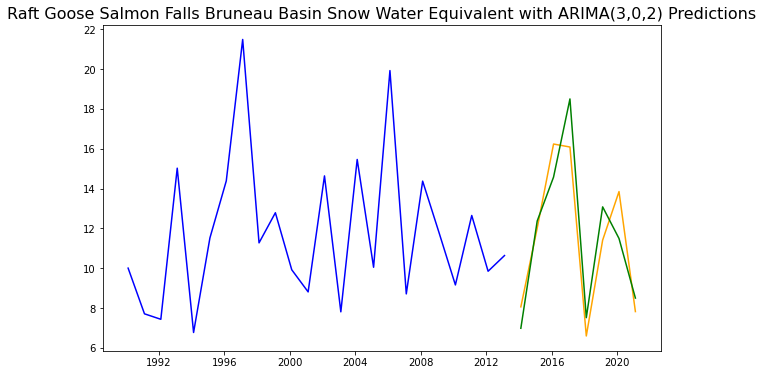


Snake Above Palisades
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(0,1,1).
This model has an AIC of 142.24579564617622.


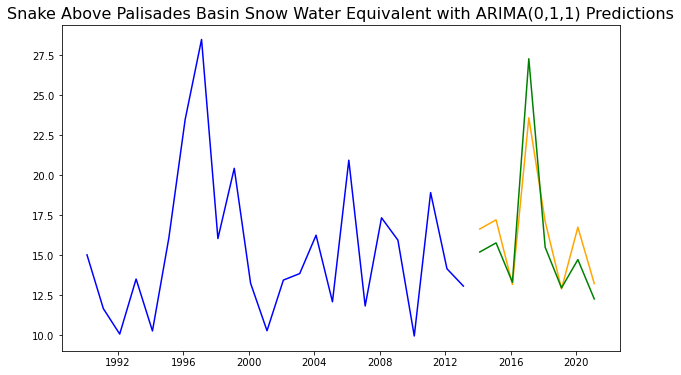


Umatilla Walla Walla Willow
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(2,1,3).
This model has an AIC of 135.50522604537412.


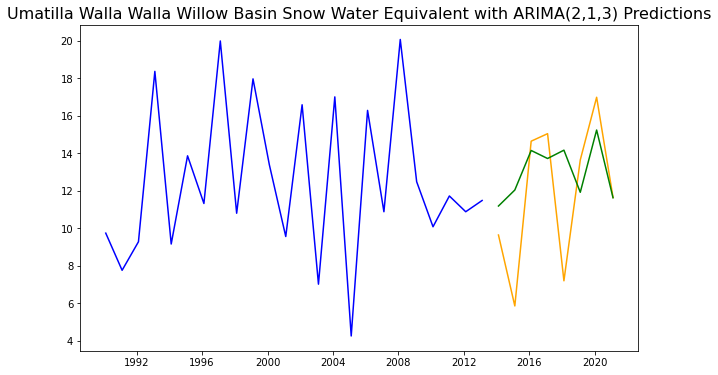


Upper Clark Fork River Basin
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(0,1,1).
This model has an AIC of 120.02356975086302.


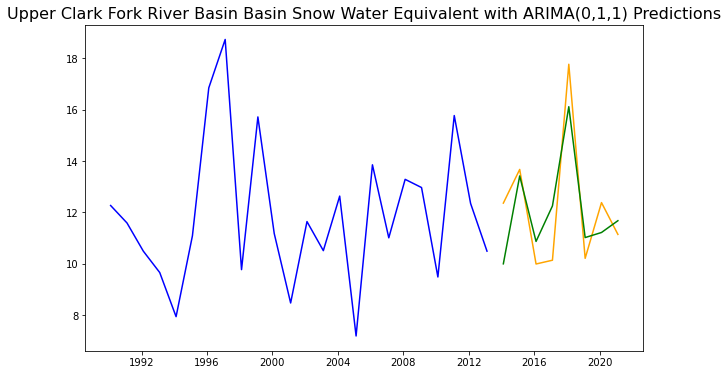


Weiser Payette Boise
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(1,1,0).
This model has an AIC of 151.40983353595456.


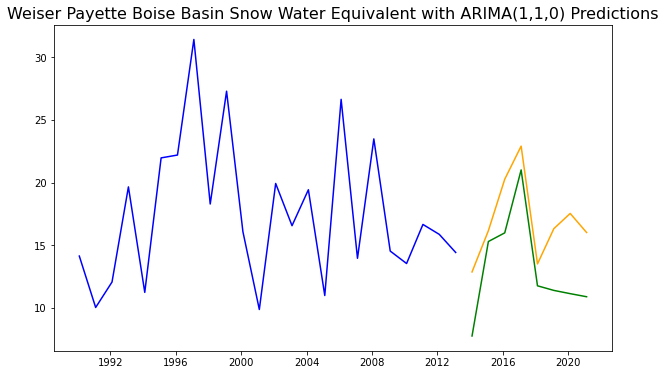


White Green Cedar Skykomish Snoqualmi Baker Skagit
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(0,0,3).
This model has an AIC of 165.211173820264.


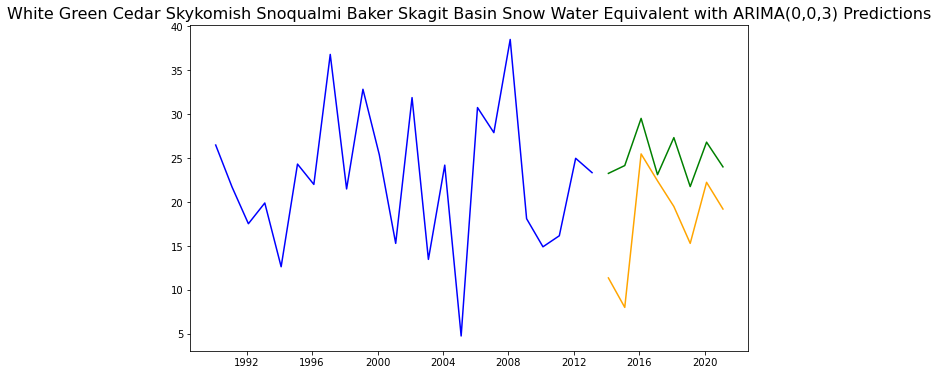


Willamette
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(1,1,1).
This model has an AIC of 164.71208485818943.


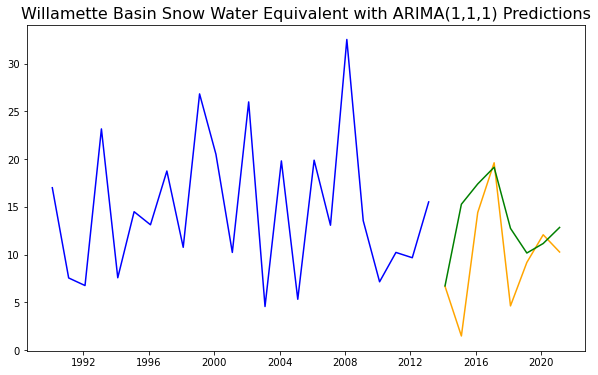


Yakima Ahtanum
MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(0,1,1).
This model has an AIC of 163.6663411968088.


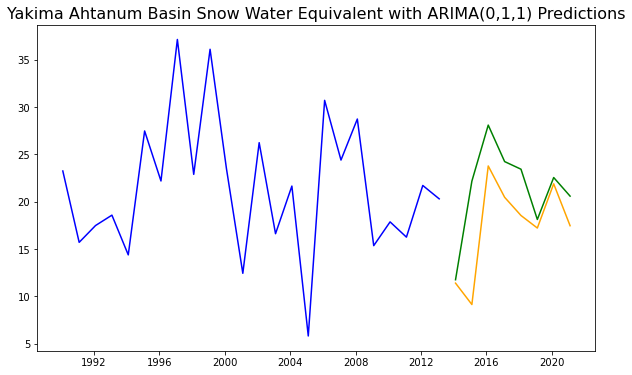

In [51]:
for df, name in zip(grouped_list, grants_basins):
    print(name)
    modeler(df, name)
    print()